# Zasoby

* https://cloud.google.com/bigquery/docs/generate-text-embedding

* https://cloud.google.com/bigquery/docs/e2e-journey

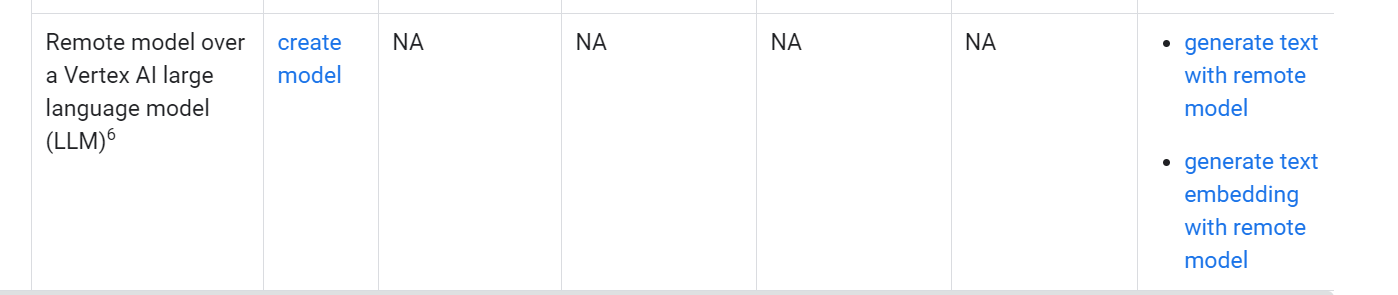

#Cele

* W tym samouczku pokazano, jak utworzyć zdalny model BigQuery ML, który odwołuje się do podstawowego modelu `textembedding-gecko` osadzania tekstu Vertex AI. Następnie używasz tego modelu z funkcją osadzania tekstu w tabeli BigQuery. `ML.GENERATE_TEXT_EMBEDDING`

#Połączenie z Vertex AI (Krok 1)

#Przyznaj uprawnienia kontu usługi połączenia (Krok 2)

#Utwórz model (Krok 3)

In [ ]:
%%bigquery

CREATE OR REPLACE MODEL pmackowka_us.model_llm_0071
  REMOTE WITH CONNECTION `us.biglake`
  OPTIONS (REMOTE_SERVICE_TYPE = 'CLOUD_AI_TEXT_EMBEDDING_MODEL_V1');

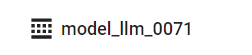

#Osadź tekst (Krok 4)

* Osadź tekst za pomocą `ML.GENERATE_TEXT_EMBEDDING` funkcji

In [ ]:
%%bigquery

SELECT *
FROM
  ML.GENERATE_TEXT_EMBEDDING(
    MODEL mydataset.embedding_model,
    TABLE mydataset.text_data,
    STRUCT(TRUE AS flatten_json_output)
  );

* Poniższy przykład osadza kolekcję recenzji filmów i porządkuje je według cosinusowej odległości od recenzji „Ten film był przeciętny” za pomocą `ML.DISTANCE` funkcji. Mniejsza odległość wskazuje na większe podobieństwo semantyczne.

In [ ]:
%%bigquery

WITH movie_review_embeddings AS (
  SELECT *
  FROM
    ML.GENERATE_TEXT_EMBEDDING(MODEL pmackowka_us.model_llm_0071,
      (
        SELECT "Movie 1" AS title, "This movie was fantastic" AS content
        UNION ALL
        SELECT "Movie 2" AS title, "This was the best movie I've ever seen!!" AS content
        UNION ALL
        SELECT "Movie 3" AS title, "This movie was just okay..." AS content
        UNION ALL
        SELECT "Movie 4" AS title, "This movie was terrible." AS content
      ),
      STRUCT(TRUE AS flatten_json_output)
    )
),
average_review_embedding AS (
  SELECT text_embedding
  FROM
    ML.GENERATE_TEXT_EMBEDDING(MODEL pmackowka_us.model_llm_0071,
      (SELECT "This movie was average" AS content),
      STRUCT(TRUE AS flatten_json_output)
    )
)
SELECT
  content,
  ML.DISTANCE(
    (SELECT text_embedding FROM average_review_embedding),
    text_embedding,
    'COSINE'
  ) AS distance_to_average_review
FROM
  movie_review_embeddings
ORDER BY distance_to_average_review;

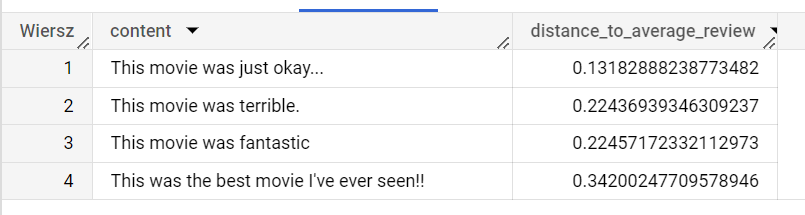

In [ ]:
%%bigquery

WITH movie_review_embeddings AS (
  SELECT *
  FROM
    ML.GENERATE_TEXT_EMBEDDING(MODEL pmackowka_us.model_llm_0071,
      (
        SELECT "Movie 1" AS title, "Ten film jest fantastyczny" AS content
        UNION ALL
        SELECT "Movie 2" AS title, "To był najlepszy film jaki kiedykolwiek widziałem!!" AS content
        UNION ALL
        SELECT "Movie 3" AS title, "Ten film był po prostu w porządku..." AS content
        UNION ALL
        SELECT "Movie 4" AS title, "Ten film był okropny." AS content
      ),
      STRUCT(TRUE AS flatten_json_output)
    )
),
average_review_embedding AS (
  SELECT text_embedding
  FROM
    ML.GENERATE_TEXT_EMBEDDING(MODEL pmackowka_us.model_llm_0071,
      (SELECT "Ten film był średni" AS content),
      STRUCT(TRUE AS flatten_json_output)
    )
)
SELECT
  content,
  ML.DISTANCE(
    (SELECT text_embedding FROM average_review_embedding),
    text_embedding,
    'COSINE'
  ) AS distance_to_average_review
FROM
  movie_review_embeddings
ORDER BY distance_to_average_review;


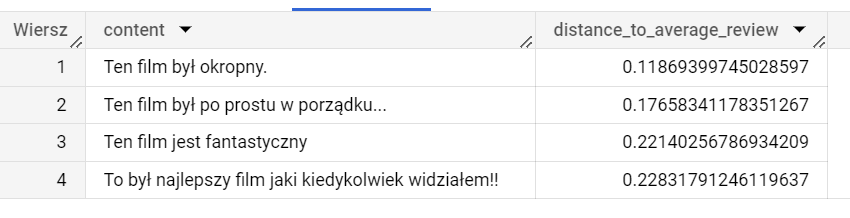